## Практическая работа №7

In [2]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt

#### Обработка данных с учетом особенностей их съемки и формирование массивов точек отснятых границ.

In [3]:
log_file = open('inph1.txt', 'r')
log_info = log_file.readlines()
log_file.close()

ITER = 681
PRIMARY_ANGLE = (4 * math.pi) / 3
SECONDARY_ANGLE = [PRIMARY_ANGLE / 2 - (iteration * PRIMARY_ANGLE)/(ITER - 1) for iteration in range(ITER)]

x_dots = []
y_dots = []

for i in range(len(log_info)):
    log_info[i] = log_info[i].replace(';', '')
    log_info[i] = log_info[i].replace(',',' ')
    log_info[i] = [float(elem) for elem in log_info[i].split()]
    for j in range(len(log_info[i])):
        if log_info[i][j] == 5.6:
            log_info[i][j] = 0.0
    
count = 0
for current_log in log_info:  
    for i in range(3, len(current_log)):
        if current_log[i] != 0:
            x_dots.append(current_log[0] + 0.3 * math.cos(current_log[2]) + current_log[i] * math.cos(current_log[2] + SECONDARY_ANGLE[i - 3]))
        else:
            x_dots.append(0)
            
    if current_log[0] + 0.3 * math.cos(current_log[2]) + current_log[i] * math.cos(current_log[2] + SECONDARY_ANGLE[i - 3]) > 100:
                print(current_log)
            
    for i in range(3, len(current_log)):
        if current_log[i] != 0:
            y_dots.append(current_log[1] + 0.3 * math.sin(current_log[2]) + current_log[i] * math.sin(current_log[2] + SECONDARY_ANGLE[i - 3]))   
        else:
            y_dots.append(0)

result = pd.DataFrame(list(zip(x_dots, y_dots)), columns = ['X_dots', 'Y_dots'])
print(result)
result.to_csv('result_dots.csv', header = None)

       X_dots  Y_dots
0         0.0     0.0
1         0.0     0.0
2         0.0     0.0
3         0.0     0.0
4         0.0     0.0
...       ...     ...
68095     0.0     0.0
68096     0.0     0.0
68097     0.0     0.0
68098     0.0     0.0
68099     0.0     0.0

[68100 rows x 2 columns]


#### Построение "карты" отснятой местности на основе обработанных данных

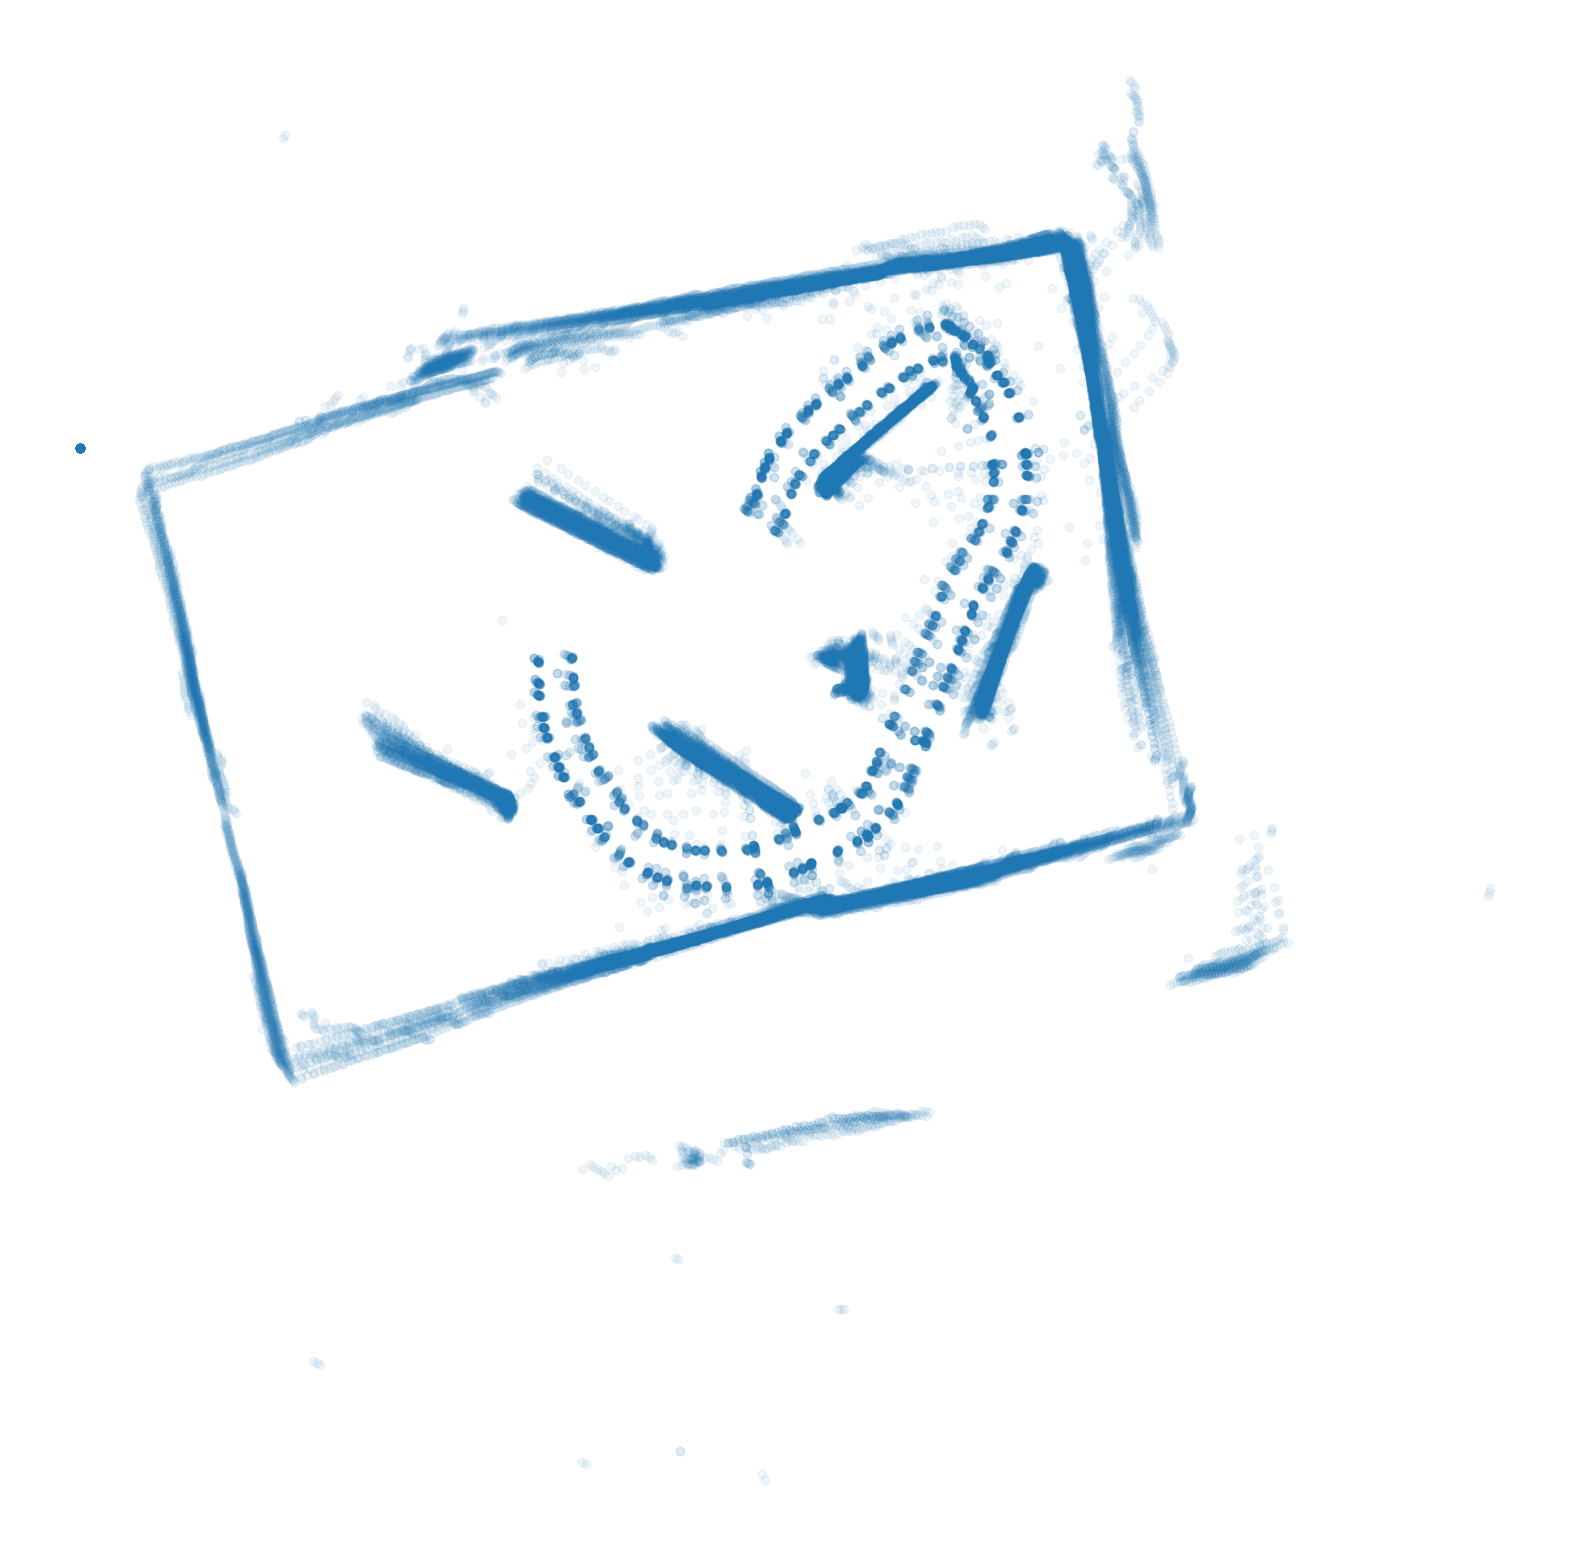

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize = (20, 20))
plt.plot(x_dots, y_dots, 'o', alpha = 0.07)
plt.axis('off')
plt.show()
plt.savefig('map.jpg')

####  Представление отснятых данных в виде файла формата gif

In [5]:
import glob
from PIL import Image

In [1]:
dataframe = pd.read_csv('result_dots.csv')
plt.figure(figsize = (20, 20))
x = []
y = []

X_dots = dataframe['0.0'].tolist()
Y_dots = dataframe['0.0.1'].tolist()
for i in range(len(X_dots) // 681):
    x.append(X_dots[681 * i : 681 * (i + 1)])
    y.append(Y_dots[681 * i : 681 * (i + 1)])
    plt.plot(x, y, 'o', alpha = 0.03)
    plt.axis('off')
    plt.savefig(f"C:/Users/Ivan/Untitled_Folder/{i}.jpg")

NameError: name 'pd' is not defined

In [6]:
frames = []
for i in range(99):
    frame = Image.open(f'C:/Users/Ivan/Untitled_Folder/{i}.jpg')
    frames.append(frame)
frames[0].save('map_animation.gif', save_all = True, append_images = frames[1:], optimize = True, duration = 100, loop = 0)

<img src = "map_animation.gif" width = "750" align = "center">